In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Functions

In [17]:
def conv_flops(batch_size, input_height, input_width, 
               num_input_filters, num_output_filters,
               input_height_padding, input_width_padding, 
               stride_size_height, stride_size_width, 
               filter_size_height, filter_size_width):
    
    #determine size of output
    output_height = int(np.floor((input_height+2*input_height_padding-filter_size_height)/stride_size_height+1))
    output_width = int(np.floor((input_width+2*input_width_padding-filter_size_width)/stride_size_width+1))
    
    #flops per output pixel
    flops_per_output_pixel = 2 * num_input_filters * filter_size_height * filter_size_width
    
    #size of the output batch
    num_pixels_output_batch = batch_size * num_output_filters * output_height * output_width
    
    return flops_per_output_pixel * num_pixels_output_batch


def conv_memory_elements(batch_size, input_height, input_width, 
               num_input_filters, num_output_filters,
               input_height_padding, input_width_padding, 
               stride_size_height, stride_size_width, 
               filter_size_height, filter_size_width):
    
    #the input image:
    num_elements_input_batch = batch_size * input_height * input_width * num_input_filters
    
    #the kernel:
    num_elements_kernel = num_input_filters * num_output_filters * filter_size_height * filter_size_width
    
    #the output
    output_height = int(np.floor((input_height+2*input_height_padding-filter_size_height)/stride_size_height+1))
    output_width = int(np.floor((input_width+2*input_width_padding-filter_size_width)/stride_size_width+1))
    num_elements_output_batch = batch_size * num_output_filters * output_height * output_width
    
    #load size
    num_load_elements = num_elements_input_batch + num_elements_kernel
    num_store_elements = num_elements_output_batch
    
    return num_load_elements, num_store_elements


def conv_ai(batch_size, input_height, input_width, 
               num_input_filters, num_output_filters,
               input_height_padding, input_width_padding, 
               stride_size_height, stride_size_width, 
               filter_size_height, filter_size_width, type_size):
    
    flops = conv_flops(batch_size, input_height, input_width, 
               num_input_filters, num_output_filters,
               input_height_padding, input_width_padding, 
               stride_size_height, stride_size_width, 
               filter_size_height, filter_size_width)
    
    load_memory, store_memory = conv_memory_elements(batch_size, input_height, input_width, 
                   num_input_filters, num_output_filters,
                   input_height_padding, input_width_padding, 
                   stride_size_height, stride_size_width, 
                   filter_size_height, filter_size_width)
    
    load_memory *= type_size
    store_memory *= type_size
    
    return float(flops/(load_memory)), float(flops/(store_memory)), float(flops/(load_memory+store_memory))

# Plot Parameters

In [25]:
#parameters
font = { 'size'   : 15}
plt.rc('font', **font)
markersize = 10 #12
barwidth = 0.25
barspace = 0.05

#markers
colors = ['b','r','g','m','y','c']
styles = ['o','s','v','^','D',">","<","*","h","H","+","1","2","3","4","8","p","d","|","_",".",","]

# Plots

## Number of Output Filters

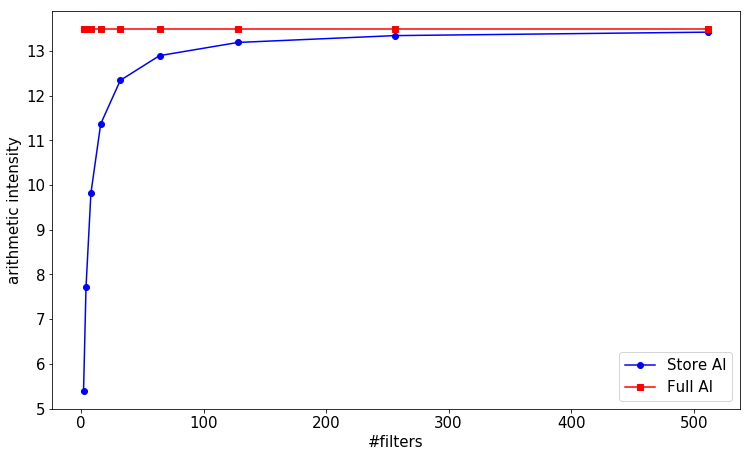

In [38]:
# some plotting for imagenet sized input
# imagenet style input:
batch_size = 16
input_height = 224
input_width = 224
num_input_filters = 3
type_size = 4

# imagenet style output
filter_size_height = 3
filter_size_width = 3
input_height_padding = filter_size_height // 2
input_width_padding = filter_size_width // 2
stride_size_height = 1
stride_size_width = 1

#init plot
fig = plt.figure(1,figsize=(10.67,6.6))
plt.clf()
ax = fig.gca()
ax.set_ylabel('arithmetic intensity')
ax.set_xlabel('#filters')

xvals = [2**x for x in range(1,10)]

#full AI
yvals_all = [conv_ai(batch_size, input_height, input_width, 
               num_input_filters, x,
               input_height_padding, input_width_padding, 
               stride_size_height, stride_size_width, 
               filter_size_height, filter_size_width, type_size)[2] for x in xvals]

#load AI
yvals_load = [conv_ai(batch_size, input_height, input_width, 
               num_input_filters, x,
               input_height_padding, input_width_padding, 
               stride_size_height, stride_size_width, 
               filter_size_height, filter_size_width, type_size)[0] for x in xvals]

#store AI
yvals_store = [conv_ai(batch_size, input_height, input_width, 
               num_input_filters, x,
               input_height_padding, input_width_padding, 
               stride_size_height, stride_size_width, 
               filter_size_height, filter_size_width, type_size)[1] for x in xvals]

#plot
ax.plot(xvals, yvals_all, color=colors[0], marker=styles[0], label="Store AI")
ax.plot(xvals, yvals_store, color=colors[1], marker=styles[1], label="Full AI")

#legend
ax.legend()

#save figure
plt.tight_layout()
plt.savefig('naive_plots/intensity_vs_output_filters.png')

## Filter Size

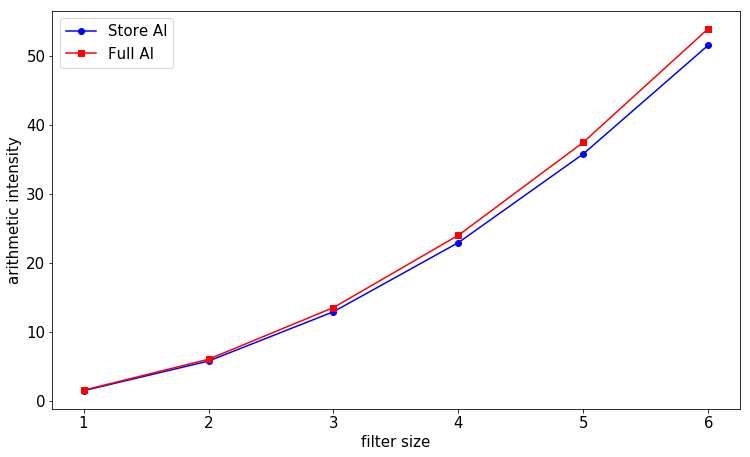

In [44]:
# some plotting for imagenet sized input
# imagenet style input:
batch_size = 16
input_height = 224
input_width = 224
num_input_filters = 3
type_size = 4

# imagenet style output
num_output_filters = 64
stride_size_height = 1
stride_size_width = 1

#init plot
fig = plt.figure(1,figsize=(10.67,6.6))
plt.clf()
ax = fig.gca()
ax.set_ylabel('arithmetic intensity')
ax.set_xlabel('filter size')

xvals = [x for x in range(1,7)]

#full AI
yvals_all = [conv_ai(batch_size, input_height, input_width, 
               num_input_filters, num_output_filters,
               x//2, x//2, 
               stride_size_height, stride_size_width, 
               x, x, type_size)[2] for x in xvals]

#load AI
yvals_load = [conv_ai(batch_size, input_height, input_width, 
               num_input_filters, num_output_filters,
               x//2, x//2, 
               stride_size_height, stride_size_width, 
               x, x, type_size)[0] for x in xvals]

#store AI
yvals_store = [conv_ai(batch_size, input_height, input_width, 
               num_input_filters, num_output_filters,
               x//2, x//2, 
               stride_size_height, stride_size_width, 
               x, x, type_size)[1] for x in xvals]

#plot
ax.plot(xvals, yvals_all, color=colors[0], marker=styles[0], label="Store AI")
ax.plot(xvals, yvals_store, color=colors[1], marker=styles[1], label="Full AI")
#ax.plot(xvals, yvals_load, color=colors[2], marker=styles[2], label="Load AI")

#legend
ax.legend()

#save figure
plt.tight_layout()
plt.savefig('naive_plots/intensity_vs_filter_size.png')

## Stride Size

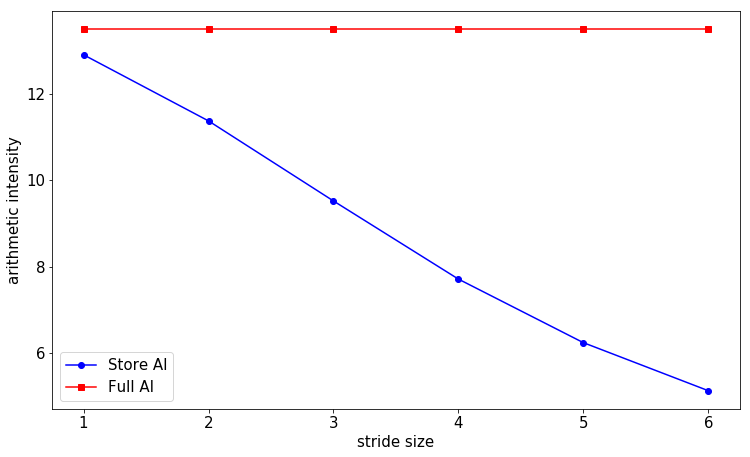

In [46]:
# some plotting for imagenet sized input
# imagenet style input:
batch_size = 16
input_height = 224
input_width = 224
num_input_filters = 3
type_size = 4

# imagenet style output
num_output_filters = 64
filter_size_height = 3
filter_size_width = 3
input_height_padding = filter_size_height // 2
input_width_padding = filter_size_width // 2

#init plot
fig = plt.figure(1,figsize=(10.67,6.6))
plt.clf()
ax = fig.gca()
ax.set_ylabel('arithmetic intensity')
ax.set_xlabel('stride size')

xvals = [x for x in range(1,7)]

#full AI
yvals_all = [conv_ai(batch_size, input_height, input_width, 
               num_input_filters, num_output_filters,
               input_height_padding, input_width_padding, 
               x, x, 
               filter_size_height, filter_size_width, type_size)[2] for x in xvals]

#load AI
yvals_load = [conv_ai(batch_size, input_height, input_width, 
               num_input_filters, num_output_filters,
               input_height_padding, input_width_padding,
               x, x, 
               filter_size_height, filter_size_width, type_size)[0] for x in xvals]

#store AI
yvals_store = [conv_ai(batch_size, input_height, input_width, 
               num_input_filters, num_output_filters,
               input_height_padding, input_width_padding, 
               x, x, 
               filter_size_height, filter_size_width, type_size)[1] for x in xvals]

#plot
ax.plot(xvals, yvals_all, color=colors[0], marker=styles[0], label="Store AI")
ax.plot(xvals, yvals_store, color=colors[1], marker=styles[1], label="Full AI")
#ax.plot(xvals, yvals_load, color=colors[2], marker=styles[2], label="Load AI")

#legend
ax.legend()

#save figure
plt.tight_layout()
plt.savefig('naive_plots/intensity_vs_stride_size.png')